In [1]:
# import modules for manipulating and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import modules required for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2_op
from sklearn.metrics import mean_squared_error as MSE_op

In [3]:
# read dataset
try:
    df = pd.read_excel('HW4_Data.xlsx')
    # df = pd.read_excel('HW4_Data.csv')
    print("Data was saved in 'df' variable successfully.")
except:
    print("Data reading failed.")


Data was saved in 'df' variable successfully.


In [4]:
df.head(3)

,Sample No.,No. of weekly trips per HH,X1 (car ownership),X2 (annual income *1000$)
0,1,78,0,26
1,2,74,1,29
2,3,104,2,56


In [5]:
# organizing and renaming columns
df.index = df["Sample No."]
df.drop(columns="Sample No." , inplace=True)
df.columns = ["Y" , "X1" , "X2"]

In [6]:
df.head(3)

,Y,X1,X2
Sample No.,,,
1,78,0,26
2,74,1,29
3,104,2,56


In [7]:
# check if there are any duplicate rows
print(f"number of duplicate roows : {df.duplicated().sum()}")

number of duplicate roows : 0


In [8]:
# see number of null values
df.isna().sum().to_frame().reset_index().rename(columns={"index":"column" , 0:"Missing Values"})

,column,Missing Values
0,Y,0
1,X1,0
2,X2,0


In [9]:
# check dtypes
df.dtypes.to_frame().reset_index().rename(columns={0:"dtype" , "index":"column"})

,column,dtype
0,Y,int64
1,X1,int64
2,X2,int64


<Axes: >

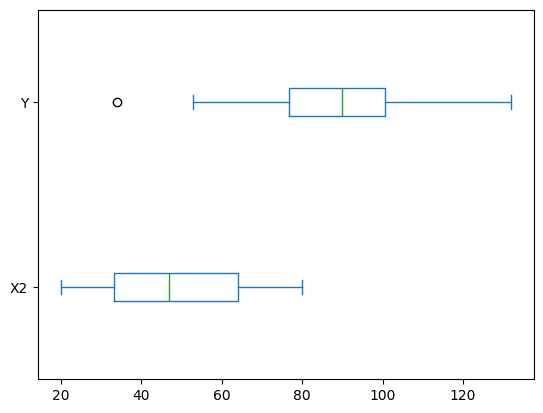

In [10]:
# check if there are any outliers
df[["X2" , "Y"]].plot.box(vert=False)

In [11]:
# encode X1
df.loc[df["X1"] >= 3 , "X1"] = "Z3"
df["X1"].replace({0:"Z1" , 1:"Z1" , 2:"Z2"} , inplace=True)

In [12]:
# bin X2
Labels = ["U1" , "U2" , "U3" , "U4"]
Bins = [0 , 20 , 50 , 70 , np.inf]
df["X2"] = pd.cut(df["X2"] , bins = Bins , labels = Labels)

In [13]:
# define dummy variables
df = pd.get_dummies(df , prefix="" , prefix_sep="" , dtype=int)

In [14]:
# export cleaned data
df.to_excel("HW4_Data_Cleand.xlsx")
df.to_csv("HW4_Data_Cleand.csv")

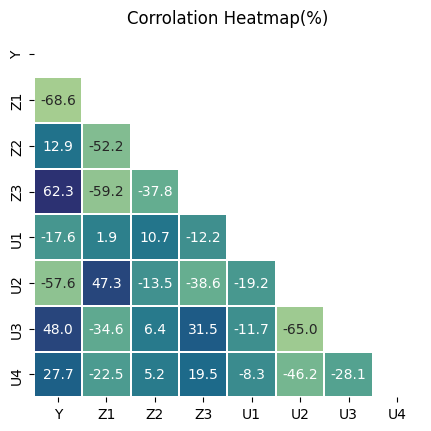

In [15]:
# check corrolation between features and label
Corr = df.corr()
Mask = np.triu(np.ones_like(Corr, dtype=bool))
fig , ax = plt.subplots(nrows=1 , ncols=1)
ax = sns.heatmap(Corr*100 , annot=True , mask=Mask ,
                cbar=False , cmap="crest" , fmt=".1f",
                linewidths = 0.108)
fig.set_size_inches(5,4.75)
ax.set_title("Corrolation Heatmap(%)")
plt.show()

In [16]:
df.head(3)

,Y,Z1,Z2,Z3,U1,U2,U3,U4
Sample No.,,,,,,,,
1,78,1,0,0,0,1,0,0
2,74,1,0,0,0,1,0,0
3,104,0,1,0,0,0,1,0


In [17]:
# seperate features and labels
X = df.drop("Y" , axis=1)
Y = df["Y"]

In [18]:
# define a function to calculate adjusted R^2
def R2_adj_op(y_true, y_pred, n_samples, n_features):
    r2 = R2_op(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

In [19]:
# train the model and calculate metrics (n times)
n = 1_000
Res = list()
for i in range(n):
    Res_i = dict()
    Ran_State = i
    # seperating train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.2 , random_state = Ran_State)
    # train the model
    regressor = LinearRegression()
    regressor.fit(X_train , Y_train)
    # predict
    Y_pred = regressor.predict(X_test)
    # loss functions and metrics
    R2 = R2_op(Y_test , Y_pred)
    R2_adj = R2_adj_op(Y_test , Y_pred , 12 , X.shape[1])
    MSE = MSE_op(Y_test , Y_pred)
    
    # for saving results in a dataframe 
    Res_i["RS"] = Ran_State
    Res_i["R2"] = R2
    Res_i["R2_adj"] = R2_adj
    Res_i["MSE"] = MSE
    Res.append(Res_i)

Res = pd.DataFrame(Res)
Res.index = Res["RS"]
Res.drop("RS" , axis=1 , inplace=True)

In [20]:
# choose the best model (according to adjusted R^2)
Res.sort_values(by="R2_adj" , ascending=False).head()

,R2,R2_adj,MSE
RS,,,
345,0.924763,0.793098,15.542763
789,0.906757,0.743582,22.588099
479,0.905439,0.739956,23.064422
430,0.885281,0.684524,30.753331
978,0.871667,0.647083,26.296752


In [21]:
# retrain the selected model
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 345)
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression()

In [22]:
# predict y for a sample x
x_sample = pd.DataFrame([0 , 1 , 0 , 0 , 0 , 1 , 0]).T
x_sample.columns = X.columns
y_sample_pred = regressor.predict(x_sample)[0]
print(f"Label(Y) for the sample X = {y_sample_pred}.")

Label(Y) for the sample X = 98.26877916073465.


<h2> <center> The End </center> <h2>